In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [22]:
ac2_rnn_data = np.load("2ac_rnn_stadata.npy")
ac4_rnn_data = np.load("4ac_rnn_stadata.npy")
ac2_q_data = np.load("2ac_q_stadata.npy")
ac4_q_data = np.load("4ac_q_stadata.npy")

In [23]:
ac2_rnn_mean = ac2_rnn_data.mean(axis=0)
ac2_rnn_mean_mean = ac2_rnn_mean.mean(axis=0)
ac2_rnn_std_std = ac2_rnn_data.std(axis=0).std(axis=0)

ac4_rnn_mean = ac4_rnn_data.mean(axis=0)
ac4_rnn_mean_mean = ac4_rnn_mean.mean(axis=0)
ac4_rnn_std_std = ac4_rnn_data.std(axis=0).std(axis=0)

ac2_q_mean = ac2_q_data.mean(axis=0)
ac2_q_mean_mean = ac2_q_mean.mean(axis=0)
ac2_q_std_std = ac2_q_data.std(axis=0).std(axis=0)

ac4_q_mean = ac4_q_data.mean(axis=0)
ac4_q_mean_mean = ac4_q_mean.mean(axis=0)
ac4_q_std_std = ac4_q_data.std(axis=0).std(axis=0)

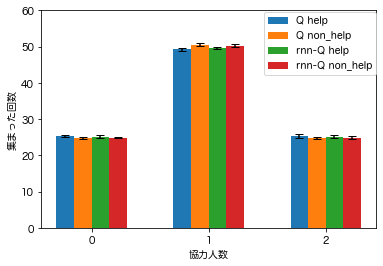

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.set_ylim(0, 60)
ax.set_xticks([0.45, 2.45, 4.45])
ax.set_xticklabels([0, 1, 2])
ax.set_xlabel("協力人数")
ax.set_ylabel("集まった回数")


ax.bar([0, 2, 4], ac4_q_mean_mean, width=0.3, label='Q help')
ax.bar([0.3, 2.3, 4.3], ac2_q_mean_mean, width=0.3, label='Q non_help')
ax.bar([0.6, 2.6, 4.6], ac4_rnn_mean_mean, width=0.3, label='rnn-Q help')
ax.bar([0.9, 2.9, 4.9], ac2_rnn_mean_mean, width=0.3, label='rnn-Q non_help')

ax.errorbar([0, 2, 4], ac4_q_mean_mean, ac4_q_std_std, linestyle='None', marker='', color='black', capsize=4)
ax.errorbar([0.3, 2.3, 4.3], ac2_q_mean_mean, ac2_q_std_std, linestyle='None', marker='', color='black', capsize=4)
ax.errorbar([0.6, 2.6, 4.6], ac4_rnn_mean_mean, ac4_rnn_std_std, linestyle='None', marker='', color='black', capsize=4)
ax.errorbar([0.9, 2.9, 4.9], ac2_rnn_mean_mean, ac2_rnn_std_std, linestyle='None', marker='', color='black', capsize=4)

fig.legend(loc='upper right', bbox_to_anchor = (0.97, 0.98), borderaxespad=3, fontsize=10)
fig.savefig("sample.png", bbox_inches="tight", pad_inches=0.05, dpi=200)

In [27]:
stats.ttest_rel(ac2_rnn_data[:, 0, 0].flatten(), ac4_rnn_data[:, 0, 0].flatten())

Ttest_relResult(statistic=-1.1771168646784993, pvalue=0.2448351517654141)

In [28]:
# welchのt検定
# Q-4acとQ-2ac
# 0人
num_coop = 0
x = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-1.261904272024104, pvalue=0.20797000862804993)

In [29]:
# Q-4acとQ-2ac
# 1人
num_coop = 1
x = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=2.097548197035015, pvalue=0.03678727951563818)

In [30]:
# Q-4acとQ-2ac
# 2人
num_coop = 2
x = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-1.2939595487811781, pvalue=0.19668132704896515)

In [31]:
# Q-4acとrnn-2ac
# 0人
num_coop = 0
x = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-1.0838775865845522, pvalue=0.27929522547274893)

In [32]:
# Q-4acとrnn-2ac
# 0人
num_coop = 1
x = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=1.7544884527891673, pvalue=0.08037461459287676)

In [33]:
# Q-4acとrnn-2ac
# 0人
num_coop = 2
x = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-1.08938866948026, pvalue=0.2768626887240874)

In [34]:
# Q-4acとrnn-4ac
# 0人
num_coop = 0
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-0.46897966442849354, pvalue=0.6394270793185033)

In [35]:
# Q-4acとrnn-4ac
# 0人
num_coop = 1
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=0.7947713866056315, pvalue=0.42737900769554393)

In [36]:
# Q-4acとrnn-4ac
# 0人
num_coop = 2
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac4_q_data[:, 0, num_coop].flatten(), ac4_q_data[:, 1, num_coop].flatten(), ac4_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-0.47133277111024013, pvalue=0.637747987974526)

In [37]:
# Q-2acとrnn-2ac
# 0人
num_coop = 0
x = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=0.24491001580345187, pvalue=0.8066946655461354)

In [38]:
# Q-2acとrnn-2ac
# 1人
num_coop = 1
x = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-0.4128528114948159, pvalue=0.6800113410116686)

In [39]:
# Q-2acとrnn-2ac
# 2人
num_coop = 2
x = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=0.24666311688338718, pvalue=0.8053387836884228)

In [40]:
# Q-2acとrnn-4ac
# 0人
num_coop = 0
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=0.7701035038723466, pvalue=0.44184854819353536)

In [41]:
# Q-2acとrnn-4ac
# 1人
num_coop = 1
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-1.3522637543457163, pvalue=0.1773162536183251)

In [42]:
# Q-2acとrnn-4ac
# 2人
num_coop = 2
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_q_data[:, 0, num_coop].flatten(), ac2_q_data[:, 1, num_coop].flatten(), ac2_q_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=0.7754418393402694, pvalue=0.43869353666759203)

In [43]:
# rnn-2acとrnn-4ac
# 0人
num_coop = 0
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=0.5671388442934753, pvalue=0.5710468093153549)

In [44]:
# rnn-2acとrnn-4ac
# 1人
num_coop = 1
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=-0.9758693679150642, pvalue=0.32992070964851417)

In [45]:
# rnn-2acとrnn-4ac
# 2人
num_coop = 2
x = np.concatenate([ac4_rnn_data[:, 0, num_coop].flatten(), ac4_rnn_data[:, 1, num_coop].flatten(), ac4_rnn_data[:, 2, num_coop].flatten()], 0)
y = np.concatenate([ac2_rnn_data[:, 0, num_coop].flatten(), ac2_rnn_data[:, 1, num_coop].flatten(), ac2_rnn_data[:, 2, num_coop].flatten()], 0)
stats.ttest_ind(x, y, equal_var='False')

Ttest_indResult(statistic=0.5598529615965029, pvalue=0.5760003125048004)